In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/archive (5)/training.1600000.processed.noemoticon.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


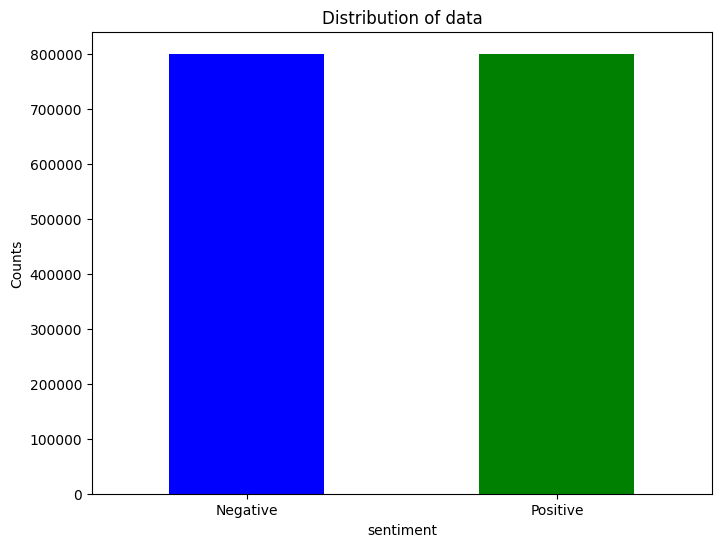

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'data' DataFrame
# Let's first convert sentiments to 'Negative' or 'Positive' based on the 'target' description you provided
# 0 = Negative, 2 = Neutral, 4 = Positive
# Since the plot shows only 'Negative' and 'Positive', we will ignore the 'Neutral' ones
data['sentiment_label'] = data['sentiment'].replace({0: 'Negative', 2: 'Neutral', 4: 'Positive'})

# Now we filter out the 'Neutral' ones if present
filtered_data = data[data['sentiment'] != 2]

# We get the count of each category
sentiment_counts = filtered_data['sentiment_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of data')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (run once)
nltk.download('punkt')

# Load the CSV file
file_path = '/content/drive/MyDrive/archive (5)/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, header=None, encoding='latin-1')

# Assuming the text data is in column 5, adjust as needed
text_data = data[5]

tokenized_data = text_data.apply(word_tokenize)

print(tokenized_data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [@, switchfoot, http, :, //twitpic.com/2y1zl, ...
1    [is, upset, that, he, ca, n't, update, his, Fa...
2    [@, Kenichan, I, dived, many, times, for, the,...
3    [my, whole, body, feels, itchy, and, like, its...
4    [@, nationwideclass, no, ,, it, 's, not, behav...
Name: 5, dtype: object


In [ ]:
for i, tokens in enumerate(tokenized_data[:10]):  # Printing tokenized words from the first 5 rows
    print(f"Tokens for row {i + 1}: {tokens}")


Tokens for row 1: ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', 'that', "'s", 'a', 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.', ';', 'D']
Tokens for row 2: ['is', 'upset', 'that', 'he', 'ca', "n't", 'update', 'his', 'Facebook', 'by', 'texting', 'it', '...', 'and', 'might', 'cry', 'as', 'a', 'result', 'School', 'today', 'also', '.', 'Blah', '!']
Tokens for row 3: ['@', 'Kenichan', 'I', 'dived', 'many', 'times', 'for', 'the', 'ball', '.', 'Managed', 'to', 'save', '50', '%', 'The', 'rest', 'go', 'out', 'of', 'bounds']
Tokens for row 4: ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']
Tokens for row 5: ['@', 'nationwideclass', 'no', ',', 'it', "'s", 'not', 'behaving', 'at', 'all', '.', 'i', "'m", 'mad', '.', 'why', 'am', 'i', 'here', '?', 'because', 'I', 'ca', "n't", 'see', 'you', 'all', 'over', 'there', '.']
Tokens for row 6: ['@', 'Kwesidei', 'not', 'the', 'whole', 'crew']
To

In [ ]:
lowercased_tokens = tokenized_data.apply(lambda tokens: [token.lower() for token in tokens])

for i, tokens in enumerate(lowercased_tokens[:10]):  # Printing tokenized words from the first 5 rows
    print(f"Lowercased tokens for row {i + 1}: {tokens}")


Lowercased tokens for row 1: ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'awww', ',', 'that', "'s", 'a', 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '.', ';', 'd']
Lowercased tokens for row 2: ['is', 'upset', 'that', 'he', 'ca', "n't", 'update', 'his', 'facebook', 'by', 'texting', 'it', '...', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', '.', 'blah', '!']
Lowercased tokens for row 3: ['@', 'kenichan', 'i', 'dived', 'many', 'times', 'for', 'the', 'ball', '.', 'managed', 'to', 'save', '50', '%', 'the', 'rest', 'go', 'out', 'of', 'bounds']
Lowercased tokens for row 4: ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']
Lowercased tokens for row 5: ['@', 'nationwideclass', 'no', ',', 'it', "'s", 'not', 'behaving', 'at', 'all', '.', 'i', "'m", 'mad', '.', 'why', 'am', 'i', 'here', '?', 'because', 'i', 'ca', "n't", 'see', 'you', 'all', 'over', 'there', '.']
Lowercased tok

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def remove_punctuation(tokens):
    # Remove punctuation using the string module
    no_punctuation = [token for token in tokens if token not in string.punctuation]
    return no_punctuation

def remove_stopwords(tokens):
    # Remove stopwords using the NLTK stopwords corpus
    no_stopwords = [token for token in tokens if token not in stop_words]
    return no_stopwords

# Remove punctuation and stopwords from the lowercased tokens
no_punctuation_tokens = lowercased_tokens.apply(remove_punctuation)
cleaned_tokens = no_punctuation_tokens.apply(remove_stopwords)

# Print some cleaned tokens
for i, tokens in enumerate(cleaned_tokens[:5]):  # Printing cleaned tokens from the first 5 rows
    print(f"Cleaned tokens for row {i + 1}: {tokens}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cleaned tokens for row 1: ['switchfoot', 'http', '//twitpic.com/2y1zl', 'awww', "'s", 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
Cleaned tokens for row 2: ['upset', 'ca', "n't", 'update', 'facebook', 'texting', '...', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah']
Cleaned tokens for row 3: ['kenichan', 'dived', 'many', 'times', 'ball', 'managed', 'save', '50', 'rest', 'go', 'bounds']
Cleaned tokens for row 4: ['whole', 'body', 'feels', 'itchy', 'like', 'fire']
Cleaned tokens for row 5: ['nationwideclass', "'s", 'behaving', "'m", 'mad', 'ca', "n't", 'see']


In [ ]:
import string

def remove_punctuation(tokens):
    no_punctuation = [token for token in tokens if token not in string.punctuation]
    return no_punctuation

no_punctuation_tokens = lowercased_tokens.apply(remove_punctuation)

# Print some tokens without punctuation
for i, tokens in enumerate(no_punctuation_tokens[:15]):  # Printing tokens without punctuation from the first 5 rows
    print(f"Tokens without punctuation for row {i + 1}: {tokens}")


Tokens without punctuation for row 1: ['switchfoot', 'http', '//twitpic.com/2y1zl', 'awww', 'that', "'s", 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']
Tokens without punctuation for row 2: ['is', 'upset', 'that', 'he', 'ca', "n't", 'update', 'his', 'facebook', 'by', 'texting', 'it', '...', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', 'blah']
Tokens without punctuation for row 3: ['kenichan', 'i', 'dived', 'many', 'times', 'for', 'the', 'ball', 'managed', 'to', 'save', '50', 'the', 'rest', 'go', 'out', 'of', 'bounds']
Tokens without punctuation for row 4: ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']
Tokens without punctuation for row 5: ['nationwideclass', 'no', 'it', "'s", 'not', 'behaving', 'at', 'all', 'i', "'m", 'mad', 'why', 'am', 'i', 'here', 'because', 'i', 'ca', "n't", 'see', 'you', 'all', 'over', 'there']
Tokens without punctuation for row 6: ['kwesidei', 'not', '

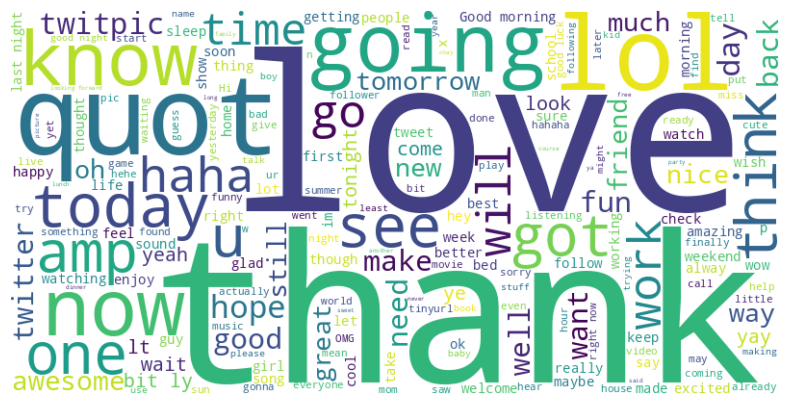

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
# Make sure to update the 'file_path' with the actual path of your CSV file
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1', names=["sentiment", "ids", "date", "flag", "user", "text"])

# Filter out the positive tweets
# Assuming the sentiment column has 4 for positive tweets
positive_tweets = dataset[dataset['sentiment'] == 4]['text']

# Combine all positive tweets into a single string
combined_tweets = " ".join(tweet for tweet in positive_tweets)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tweets)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


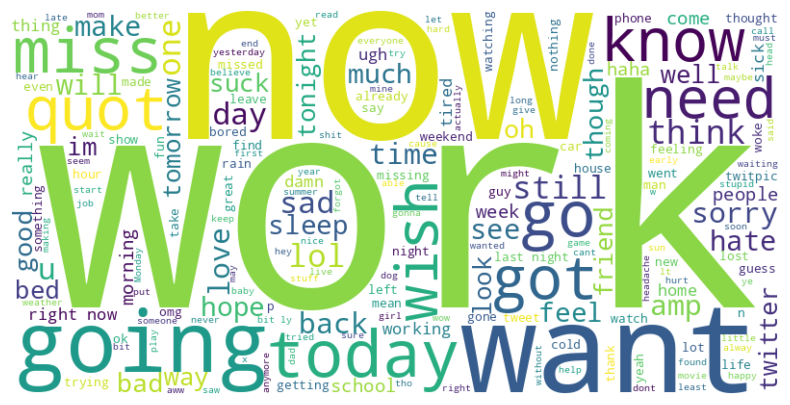

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'file_path' with the actual path of your CSV file
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1', names=["sentiment", "ids", "date", "flag", "user", "text"])

# Filter out the negative tweets
# Assuming the sentiment column has 0 for negative tweets
negative_tweets = dataset[dataset['sentiment'] == 0]['text']

# Combine all negative tweets into a single string
combined_tweets = " ".join(tweet for tweet in negative_tweets)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tweets)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_text = cleaned_tokens.apply(lambda tokens: ' '.join(tokens))

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(cleaned_text)

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_vectors.shape)


Shape of TF-IDF matrix: (1600000, 684287)


In [ ]:
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
dataset = pd.read_csv(file_path, encoding='latin-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, dataset['target'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = naive_bayes_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.765321875


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = naive_bayes_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.765321875
Precision: 0.7665433504772272
Recall: 0.765321875
F1-score: 0.76508814287393


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

naive_bayes_model = MultinomialNB()

grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

# Train the Naive Bayes classifier with the best hyperparameters
tuned_naive_bayes_model = MultinomialNB(alpha=best_alpha)
tuned_naive_bayes_model.fit(X_train, y_train)

y_pred_tuned = tuned_naive_bayes_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = tuned_naive_bayes_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print evaluation metrics
print("Model Performance on Testing Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78    159494
           4       0.79      0.73      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Model Performance on Testing Set:
Accuracy: 0.76781875
Precision: 0.7694897604351821
Recall: 0.76781875
F1-score: 0.7674989190380498
